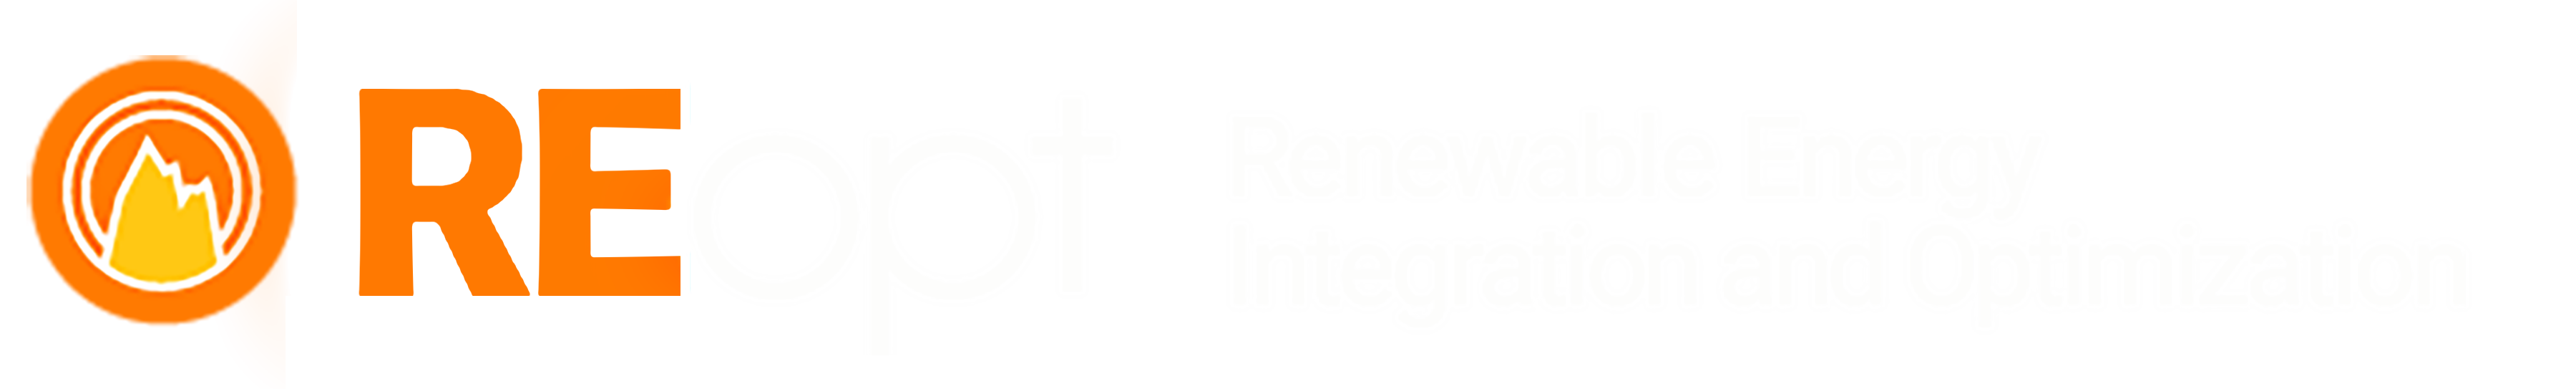
# **Honduras Training 2**
## REopt Analysis Notebook

This notebook provides tools and steps to perform REopt analysis for Honduras. This notebook includes data tabulation, visualization, and organization.


# recap

# Example 1: Baseline Analysis

Objective: Electrify a community with microgrids

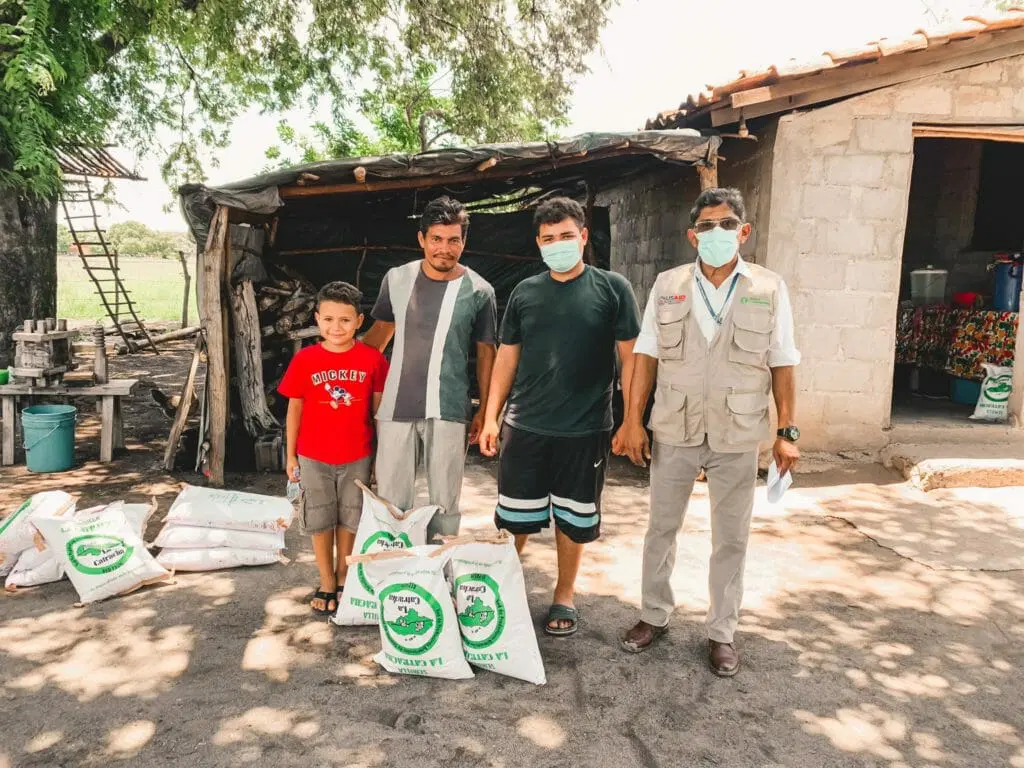

In [ ]:
#code

# Example 2: Microgrid vs Transmission Lines
Objective: Determine the cost difference between building a microgrid and how it compares to the cost of adding transmission lines based on distance to nearest transmission lines

In [ ]:
#code

# Building Loads using Webtool

Objective: Create critical loads using Critical Load Builder

![Screenshot 2024-03-20 at 2.24.05 PM.png](<attachment:Screenshot 2024-03-20 at 2.24.05 PM.png>) 
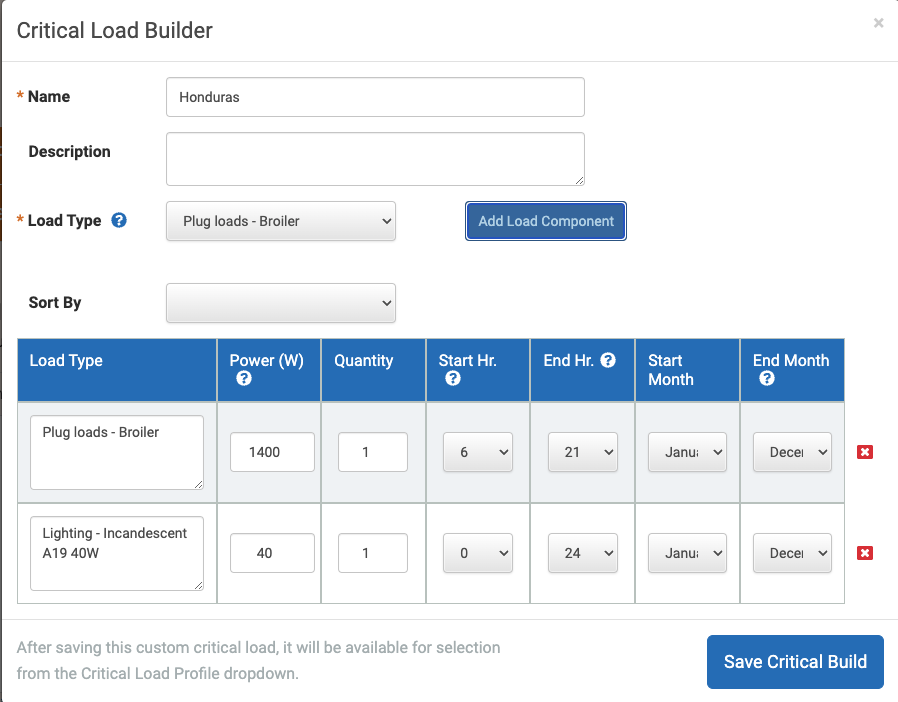

# Example 3: Adding custom PV production

In [ ]:
#code

# Example 4: Using custom PV to represent Hydro

# Example 5: Adding Productive Loads

Objective: Calculate productive loads, such as coffee processing and cooling for fish storage. Investigate and estimate the costs associated with heating coffee with natural gas. Add these loads to the baseline to see the overall impact on energy demand.

# Example 6: Modify contraints using JUMP Constraints

Modifying the mathematical model

Using the `build_reopt!` method and `JuMP` methods one can modify the REopt model before optimizing. In the following example we add a cost for curtailed PV power.

In [ ]:
using Xpress
using JuMP
using REopt

m = JuMP.Model(Xpress.Optimizer)

p = REoptInputs("pv_storage.json");

build_reopt!(m, p)

#= 
replace the original objective, which is to Min the Costs,
with the Costs + 100 * (total curtailed PV power)
=#  
JuMP.@objective(m, Min, m[:Costs] + 100 * sum(m[:dvCurtail]["PV", ts] for ts in p.time_steps));

JuMP.optimize!(m)  # normally this command is called in run_reopt

results = reopt_results(m, p)

#show comparison before and after